In [1]:
hair_path="./Problem_C_Data/hair_dryer.tsv"
microwave_path="./Problem_C_Data/microwave.tsv"
pacifier_path="./Problem_C_Data/pacifier.tsv"

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
hairdryer_info=pd.read_csv(hair_path, delimiter='\t', encoding='utf-8', index_col='review_date', parse_dates=True)
# hairdryer_info=pd.read_csv(hair_path, delimiter='\t', encoding='utf-8')
# microwave_info=pd.read_csv(microwave_path, delimiter='\t', encoding='utf-8')
# pacifier_info=pd.read_csv(pacifier_path, delimiter='\t', encoding='utf-8')

Setup Complete


In [3]:
hairdryer_info.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,,,,,,
2015-08-31,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!
2015-08-31,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po..."
2015-08-31,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!
2015-08-31,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style
2015-08-31,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...


In [4]:
df = hairdryer_info.drop(columns=['marketplace','product_category','customer_id','review_id','product_parent'])

In [99]:
import datetime
df['year'] = pd.DatetimeIndex(df.index).year.astype(str)
df['month'] = pd.DatetimeIndex(df.index).month.astype(str)
df['date'] = df['year']+'-'+df['month']+'-1'
df.head()

,product_id,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,year,month,date
review_date,,,,,,,,,,,,
2015-08-31,B003V264WW,remington ac2015 t|studio salon collection pea...,5,0,0,N,Y,Works great,Works great!,2015,8,2015-8-1
2015-08-31,B0009XH6V4,andis micro turbo hair dryer,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015,8,2015-8-1
2015-08-31,B0007NZPY6,conair pro hair dryer,5,0,1,N,Y,Five Stars,Love this dryer!,2015,8,2015-8-1
2015-08-31,B00BB8ZIW0,remington silk ceramic professional hair dryer,5,0,0,N,Y,Five Stars,styling hair in style,2015,8,2015-8-1
2015-08-31,B003V264WW,remington ac2015 t|studio salon collection pea...,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,2015,8,2015-8-1


In [105]:
df_groupby_p_t = df.groupby(['product_id','date','review_date']).star_rating.count().reset_index()
df_groupby_p_t.columns = ['product_id','date','cnt','review_date']
# df_groupby_pid.reset_index()
df_groupby_p_t

,product_id,date,cnt,review_date
0,B000050FDE,2011-7-1,2011-07-02,1
1,B000052YD1,2010-3-1,2010-03-11,1
2,B00005351F,2010-8-1,2010-08-05,1
3,B00005JG0H,2010-5-1,2010-05-07,1
4,B00005JS5G,2007-4-1,2007-04-15,1
5,B00005O0MZ,2002-12-1,2002-12-18,1
6,B00005O0MZ,2002-3-1,2002-03-02,1
7,B00005O0MZ,2002-4-1,2002-04-20,1
8,B00005O0MZ,2002-7-1,2002-07-13,1
9,B00005O0MZ,2002-8-1,2002-08-13,1


In [101]:
pd.to_datetime(df_groupby_p_t.date)
df_groupby_p_t.date

0        2011-7-1
1        2010-3-1
2        2010-8-1
3        2010-5-1
4        2007-4-1
5       2002-12-1
6        2002-3-1
7        2002-4-1
8        2002-7-1
9        2002-8-1
10       2003-1-1
11       2003-2-1
12       2004-1-1
13      2004-11-1
14       2004-3-1
15       2004-5-1
16       2004-8-1
17      2005-12-1
18       2005-8-1
19       2006-2-1
20       2006-3-1
21      2007-10-1
22      2007-11-1
23      2007-12-1
24       2007-2-1
25       2007-3-1
26       2007-4-1
27       2007-8-1
28       2008-1-1
29      2008-10-1
          ...    
4547     2015-5-1
4548     2015-6-1
4549     2015-7-1
4550     2015-8-1
4551     2015-1-1
4552     2015-2-1
4553     2015-3-1
4554     2015-4-1
4555     2015-7-1
4556     2015-2-1
4557     2015-3-1
4558     2015-4-1
4559     2015-5-1
4560     2015-2-1
4561     2015-3-1
4562     2015-4-1
4563     2015-5-1
4564     2015-6-1
4565     2015-7-1
4566     2015-8-1
4567     2015-1-1
4568     2015-2-1
4569     2015-3-1
4570     2015-4-1
4571     2

In [106]:
rating_cnt = df.groupby(['product_id']).star_rating.count().reset_index().sort_values(by='star_rating',ascending=False)

In [107]:
cnt_top_five = rating_cnt.head()
cnt_top_five

,product_id,star_rating
455,B003V264WW,587
61,B0009XH6TG,555
227,B00132ZG3U,535
5,B00005O0MZ,424
175,B000R80ZTQ,321


In [108]:
top_five_monthly_cnt = df_groupby_p_t.loc[ df_groupby_p_t['product_id'].isin(cnt_top_five['product_id']) ]

In [109]:
names = top_five_monthly_cnt['product_id'].unique()
names

array(['B00005O0MZ', 'B0009XH6TG', 'B000R80ZTQ', 'B00132ZG3U',
       'B003V264WW'], dtype=object)

In [110]:
top_five_monthly_cnt.shape

(2021, 4)

In [113]:
first = top_five_monthly_cnt.loc[top_five_monthly_cnt.product_id == names[0]]
# first.head()
first = first[['review_date','cnt']]

first.rename(columns={'cnt': names[0]}, inplace=True)
first.shape

(367, 2)

In [112]:
second = top_five_monthly_cnt.loc[top_five_monthly_cnt.product_id == names[1]]
second = second[['date','cnt']]

second.rename(columns={'cnt': names[1]}, inplace=True)
second.head()

,date,B0009XH6TG
1944,2005-9-1,2005-09-15
1945,2006-1-1,2006-01-13
1946,2006-1-1,2006-01-28
1947,2006-12-1,2006-12-02
1948,2006-2-1,2006-02-03


In [114]:
# res=pd.merge(first, second, on='date')
res=pd.merge(first, second, left_on='review_date', right_on='review_date', how='outer')

res

KeyError: 'review_date'

In [96]:
first = top_five_monthly_cnt.loc[top_five_monthly_cnt.product_id == names[0]]
first = first[['date','cnt']]

first.rename(columns={'cnt': names[0]}, inplace=True)
res=first

In [115]:
for i in range(4):
    temp = top_five_monthly_cnt.loc[top_five_monthly_cnt.product_id == names[i+1]]
    temp = temp[['review_date','cnt']]
    temp.rename(columns={'cnt': names[i+1]}, inplace=True)
    res=pd.merge(res, temp, on='review_date', how='outer')

res=res.fillna(0)

KeyError: 'review_date'

In [98]:
res.set_index('date', inplace=True)
res

,B00005O0MZ,B0009XH6TG,B000R80ZTQ,B00132ZG3U,B003V264WW
date,,,,,
2002-12,1.0,0.0,0.0,0.0,0.0
2002-3,1.0,0.0,0.0,0.0,0.0
2002-4,1.0,0.0,0.0,0.0,0.0
2002-7,1.0,0.0,0.0,0.0,0.0
2002-8,1.0,0.0,0.0,0.0,0.0
2003-1,2.0,0.0,0.0,0.0,0.0
2003-2,1.0,0.0,0.0,0.0,0.0
2004-1,2.0,0.0,0.0,0.0,0.0
2004-11,2.0,0.0,0.0,0.0,0.0


In [65]:
res.sort_values(by='date')

,B00005O0MZ,B0009XH6TG,B000R80ZTQ
date,,,
2002-12,1.0,NaN,NaN
2002-3,1.0,NaN,NaN
2002-4,1.0,NaN,NaN
2002-7,1.0,NaN,NaN
2002-8,1.0,NaN,NaN
2003-1,2.0,NaN,NaN
2003-2,1.0,NaN,NaN
2004-1,2.0,NaN,NaN
2004-11,2.0,NaN,NaN


In [87]:
pd.to_datetime(res.index)
res.index

Index(['2002-12', '2002-3', '2002-4', '2002-7', '2002-8', '2003-1', '2003-2',
       '2004-1', '2004-11', '2004-3',
       ...
       '2010-7', '2010-8', '2010-9', '2011-11', '2011-12', '2011-2', '2011-4',
       '2008-4', '2009-10', '2009-9'],
      dtype='object', name='date', length=124)

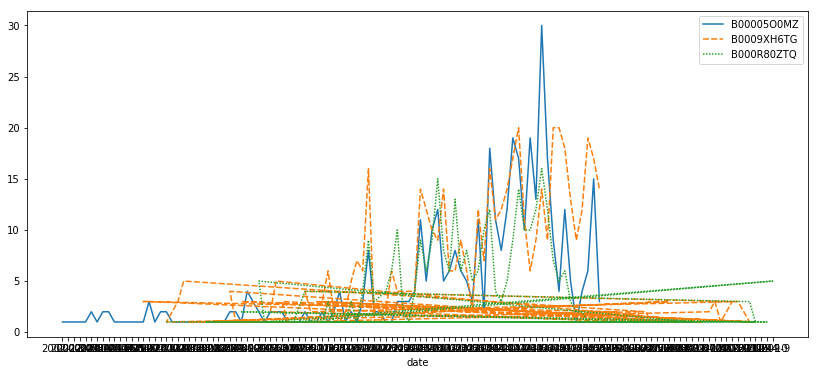

In [66]:
plt.figure(figsize=(14,6))
sns.lineplot(data=res)

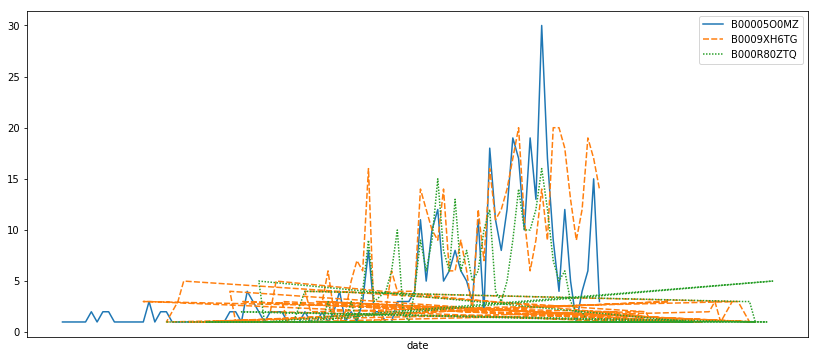

In [85]:
import matplotlib.dates as mdates



plt.figure(figsize=(14,6))
ax = sns.lineplot(data=res)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

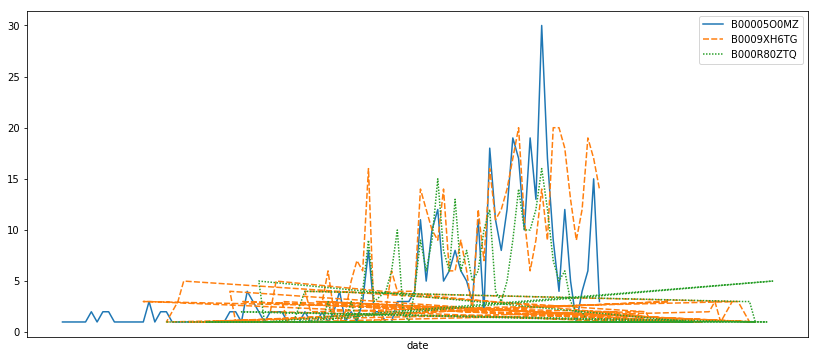

In [77]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=res)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)
plt.show()

In [155]:
hairdryer_info.sort_values(by='helpful_votes', ascending=False)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,,,,,,
2010-03-10,US,32455129,R2X4H7F2PTT7R8,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,499,575,N,Y,A review for guys,I didn't know what the attachments were for so...
2011-12-08,US,48661487,R3SENXU280LR5J,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,439,451,N,Y,died early,"This is a good dryer while it lasts. Quiet, g..."
2002-03-02,US,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,3,320,332,N,Y,"Some pluses, some minuses",This is my only experience with an ionic hair ...
2008-03-27,US,46065892,R2PA6YQJIOWT2T,B00070E8IS,531479992,elchim professional 2001 classic hair dryer (c...,Beauty,5,315,325,N,Y,UPDATED...AGAIN! - Read fully - Compliments ke...,Let me address the title of the review. From t...
2007-08-27,US,51685936,R1SY0R012Q33B1,B000LQB5YS,194533684,t3 bespoke labs 83888-se special edition evolu...,Beauty,1,304,315,N,Y,Not authorized - you'll be taking a chance,I bought this dryer at Amazon in order to get ...
2009-03-07,US,12590234,R1F2PGWA1SN4PU,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,304,321,N,Y,Conair 225 hairdryer,My old Conair died so I read all the reviews a...
2008-11-08,US,16014319,R2WAT8K10UQ2A0,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,298,325,N,Y,A must have for frizzy troublesome hair!,I love this dryer. I used a similar one at Pl...
2008-01-13,US,52815791,R2409AP9NIOYOA,B000K7JLGM,199558933,t3 bespoke labs 83808-se featherweight profess...,Beauty,5,290,293,N,N,T3 Featherweight/Revlon Tourmaline Comparison,I bought the T3 featherweight for my wife as a...
2004-03-15,US,52964454,R2BZB6X2GV50XC,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,266,281,N,N,New shine for the ol' mane,"As a child of the Sixties, I still wear my hai..."


In [70]:
hair_groupby_time = hairdryer_info.groupby(['review_date']).star_rating.mean()

temp=hair_groupby_time.head(5)
temp

review_date
2002-03-02    3.0
2002-04-20    5.0
2002-07-13    5.0
2002-08-13    1.0
2002-08-21    5.0
Name: star_rating, dtype: float64

In [86]:
hair_groupby_time.shape

(2307,)

In [71]:
hair_time_rating = hair_groupby_time.reset_index()

In [72]:
hair_time_rating.head(5)

,review_date,star_rating
0,2002-03-02,3.0
1,2002-04-20,5.0
2,2002-07-13,5.0
3,2002-08-13,1.0
4,2002-08-21,5.0


In [76]:
hair_set_index_date = hair_time_rating.set_index('review_date')

In [97]:
hair_groupby_month = hair_set_index_date.groupby(pd.Grouper(freq='M')).mean()

In [112]:
hair_groupby_month=hair_groupby_month.dropna()
hair_groupby_month.head(5)

,star_rating
review_date,
2002-03-31,3.0
2002-04-30,5.0
2002-07-31,5.0
2002-08-31,3.0
2002-11-30,4.0


In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x = hair_groupby_month.index, y = hair_groupby_month['star_rating'], ax=ax)
# fig = sns.distplot(hair_groupby_month.index, hair_groupby_month['star_rating'], ax=ax)
fig.tick_params(labelsize=7)
x_dates = hair_groupby_month.index.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# ax.xaxis.set_minor_locator(mdates.YearLocator())

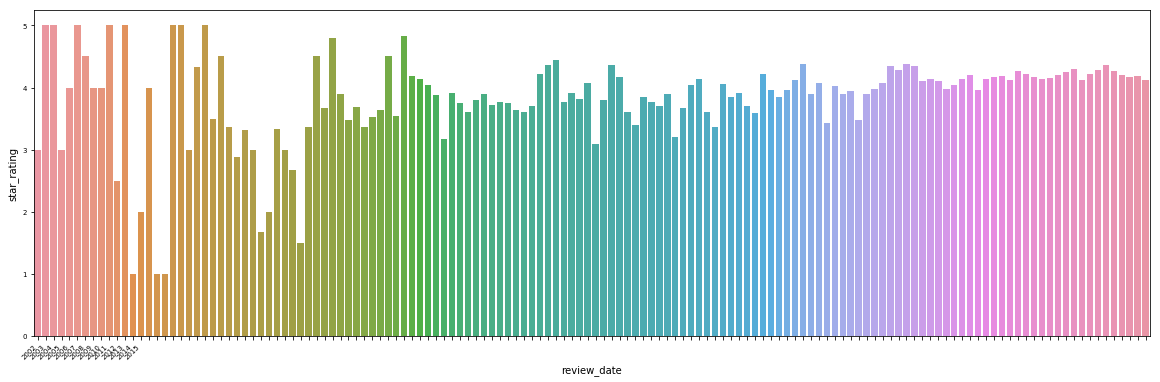

In [125]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x = hair_groupby_month.index, y = hair_groupby_month['star_rating'], ax=ax)
# fig = sns.distplot(hair_groupby_month.index, hair_groupby_month['star_rating'], ax=ax)
fig.tick_params(labelsize=7)
x_dates = hair_groupby_month.index.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.xaxis.set_minor_locator(mdates.YearLocator(1, month=12, day=1))